# E-Commerce Data
This dataset consists of orders made in different countries from December 2010 to December 2011. The company is a UK-based online retailer that mainly sells unique all-occasion gifts. Many of its customers are wholesalers. 

Not sure where to begin? Scroll to the bottom to find challenges!

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
retail = pd.read_csv("online_retail.csv")
retail.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,12/1/10 9:37,2.55,14688.0,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,12/1/10 9:37,0.42,14688.0,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,12/1/10 9:37,0.55,14688.0,United Kingdom
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,12/1/10 9:37,0.55,14688.0,United Kingdom


## Data Dictionary
| Variable    | Explanation                                                                                                                       |
|-------------|-----------------------------------------------------------------------------------------------------------------------------------|
| InvoiceNo   | A 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c' it indicates a cancellation. |
| StockCode   | A 5-digit integral number uniquely assigned to each distinct product.                                                             |
| Description | Product (item) name                                                                                                               |
| Quantity    | The quantities of each product (item) per transaction                                                                             |
| InvoiceDate | The day and time when each transaction was generated                                                                              |
| UnitPrice   | Product price per unit in sterling (pound)                                                                                        |
| CustomerID  | A 5-digit integral number uniquely assigned to each customer                                                                      |
| Country     | The name of the country where each customer resides                                                                               |

[Source](https://archive.ics.uci.edu/ml/datasets/online+retail#)  of dataset.

**Citation:** Daqing Chen, Sai Liang Sain, and Kun Guo, Data mining for the online retail industry: A case study of RFM model-based customer segmentation using data mining, Journal of Database Marketing and Customer Strategy Management, Vol. 19, No. 3, pp. 197-208, 2012 (Published online before print: 27 August 2012. doi: 10.1057/dbm.2012.17).

## Don't know where to start?

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Negative order quantities indicate returns. Which products have been returned the most?
- 📊 **Visualize**: Create a plot visualizing the profits earned from UK customers weekly, monthly, and quarterly.
- 🔎 **Analyze**: Are order sizes from countries outside the United Kingdom significantly larger than orders from inside the United Kingdom?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

You are working for an online retailer. Currently, the retailer sells over 4000 unique products. To take inventory of the items, your manager has asked you whether you can group the products into a small number of categories. The categories should be similar in terms of price and quantity sold and any other characteristics you can extract from the data.

You will need to prepare a report that is accessible to a broad audience. It should outline your motivation, steps, findings, and conclusions.

In [45]:
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


**Checking for null values in the dataset**

In [46]:
# Check for missing values
if retail.isnull().sum().any():
    print("There are missing values in the dataset.")
else:
    print("There are no missing values in the dataset.")

There are missing values in the dataset.


In [47]:
#viewing the sum of missing values
retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [48]:
# Summary statistics
if len(retail) > 0:
    print(retail.describe())
else:
    print("No data available for summary statistics.")

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [49]:
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Analysis of orders less than zero/returns

In [50]:
negative_orders=retail[retail['Quantity'] < 0]
negative_orders.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,12/1/10 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,12/1/10 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,12/1/10 12:38,4.25,17897.0,United Kingdom


Plot of negative orders

In [51]:
negative_orders['Country'].unique()  #

array(['United Kingdom', 'Germany', 'EIRE', 'Italy', 'France',
       'Australia', 'Sweden', 'Portugal', 'Austria', 'Israel', 'Belgium',
       'Bahrain', 'Spain', 'Japan', 'Channel Islands', 'Netherlands',
       'Switzerland', 'Cyprus', 'Norway', 'Saudi Arabia', 'Hong Kong',
       'Poland', 'Finland', 'Czech Republic', 'Singapore',
       'European Community', 'Malta', 'Greece', 'Denmark', 'USA'],
      dtype=object)

In [52]:
countries=negative_orders['Country'].unique()  # Get unique countries
quantity_per_country =negative_orders.groupby('Country')['Quantity'].sum()  # Sum quantity by country


In [53]:
df2=pd.DataFrame({'Country':countries,'Total':quantity_per_country})
df2.head()


,Country,Total
Country,,
Australia,United Kingdom,-556
Austria,Germany,-54
Bahrain,EIRE,-54
Belgium,Italy,-85
Channel Islands,France,-12


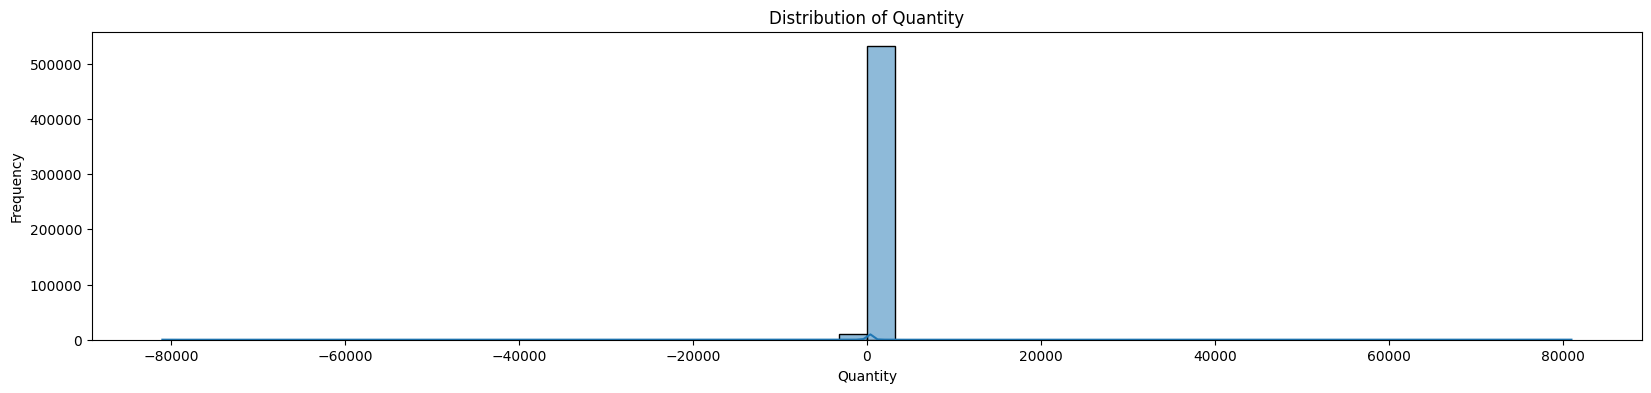

In [54]:
# Distribution of Quantity
plt.figure(figsize=(20, 4))
sns.histplot(retail['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


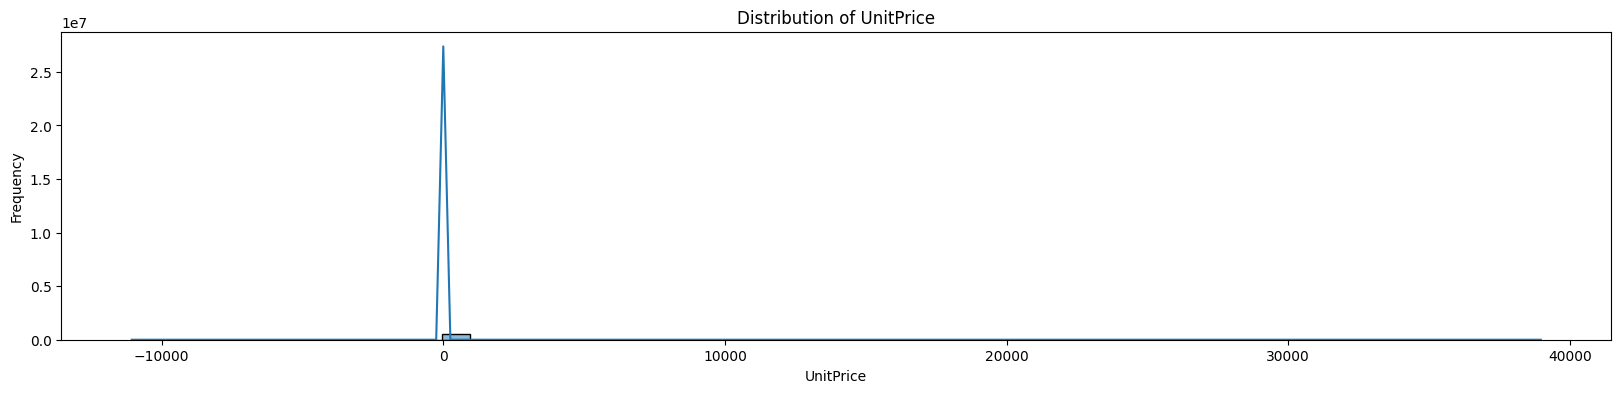

In [55]:
# Distribution of UnitPrice
plt.figure(figsize=(20, 4))
sns.histplot(retail['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')
plt.ylabel('Frequency')
plt.show()

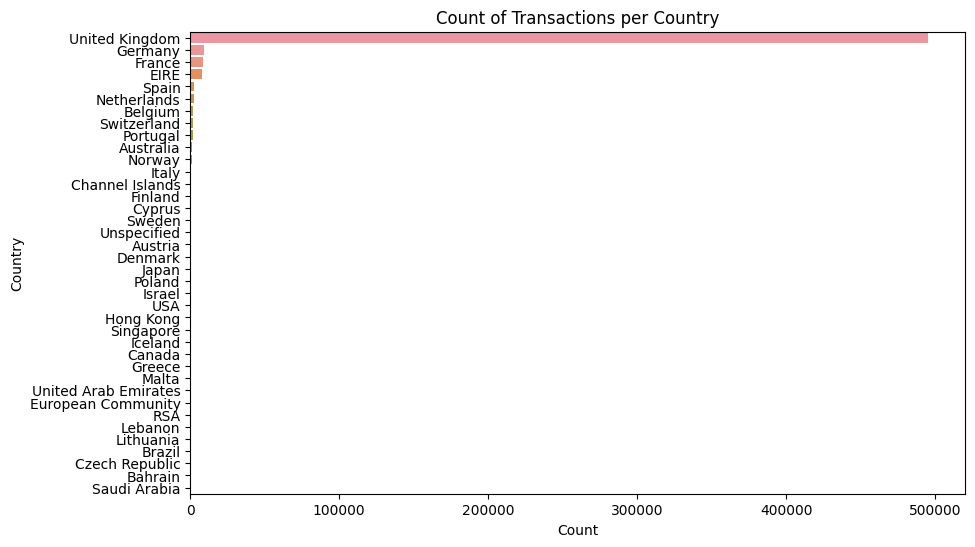

In [56]:
# Count of transactions per country
plt.figure(figsize=(10, 6))
sns.countplot(y='Country', data=retail, order=retail['Country'].value_counts().index)
plt.title('Count of Transactions per Country')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

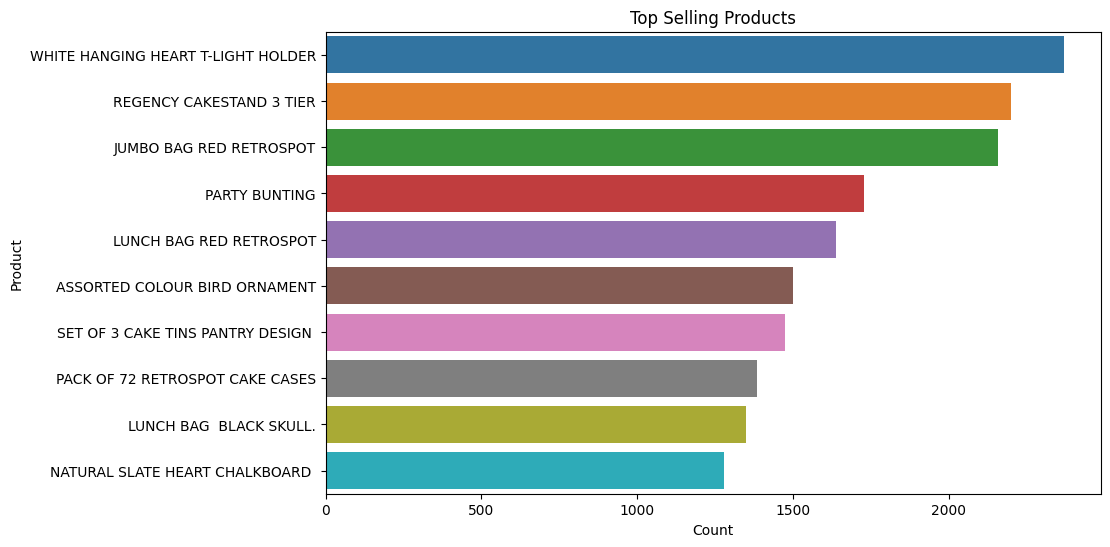

In [57]:
# Top 10 selling products
if 'Description' in retail.columns:
    top_products = retail['Description'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_products.values, y=top_products.index)
    plt.title('Top Selling Products')
    plt.xlabel('Count')
    plt.ylabel('Product')
    plt.show()
else:
    print("Description column not found in the dataset.")

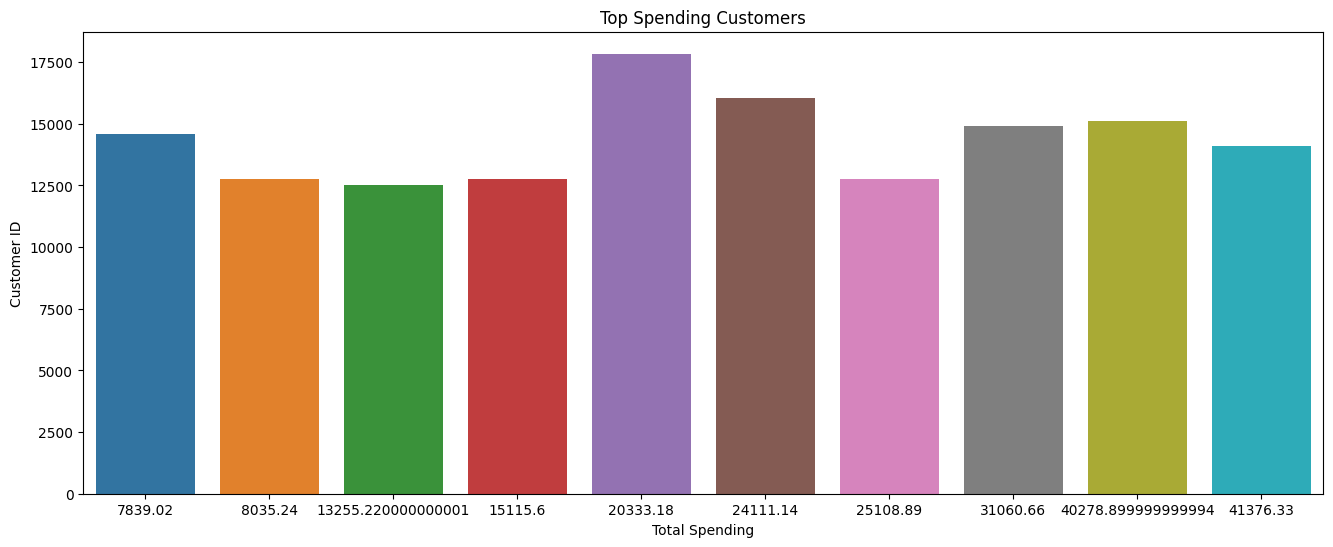

In [58]:
# Top 10 spending customers
if 'CustomerID' in retail.columns and 'UnitPrice' in retail.columns:
    top_customers = retail.groupby('CustomerID')['UnitPrice'].sum().nlargest(10)
    plt.figure(figsize=(16, 6))
    sns.barplot(x=top_customers.values, y=top_customers.index)
    plt.title('Top Spending Customers')
    plt.xlabel('Total Spending')
    plt.ylabel('Customer ID')
    plt.show()
else:
    print("CustomerID or UnitPrice column not found in the dataset.")

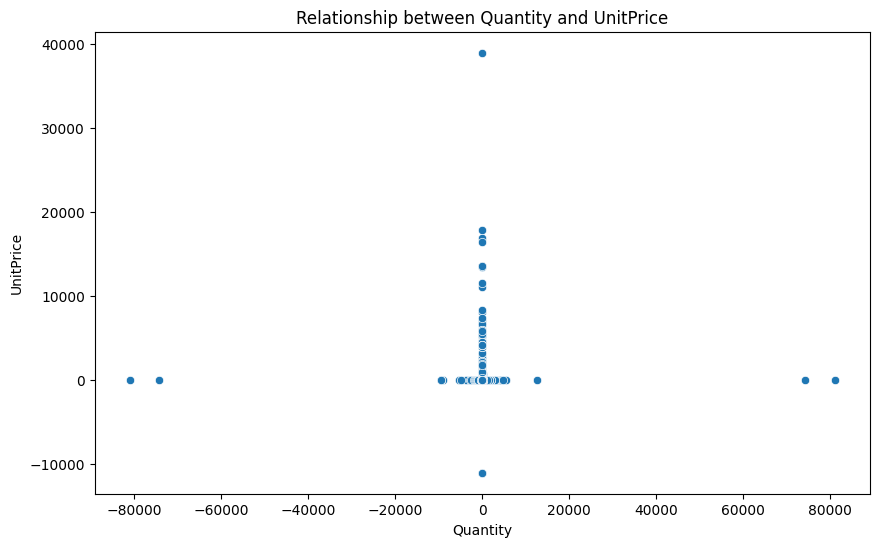

In [59]:
# Relationship between Quantity and UnitPrice
if 'Quantity' in retail.columns and 'UnitPrice' in retail.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Quantity', y='UnitPrice', data=retail)
    plt.title('Relationship between Quantity and UnitPrice')
    plt.xlabel('Quantity')
    plt.ylabel('UnitPrice')
    plt.show()
else:
    print("Quantity or UnitPrice column not found in the dataset.")